# ﾁｮｯﾄﾃﾞｷﾙ統計学

### ﾁｮｯﾄﾃﾞｷﾙ統計学とは？
- 統計学の世界を少しだけ覗いてみるという趣旨の勉強会です。
- 基本的なデータの要約方法、可視化、(ﾁｮｯﾄﾀﾞｹ確率)、 ﾁｮｯﾄｼﾀ分析について説明します。
- ~お給料を上げたい一心で~ 頑張ります。

### 始める前に
* この資料はGitHubで公開しているので、お手元の環境で試せます。 ⭐️ つけてくれてもいいです。 
* リポジトリ: `git@github.com:Soichiro-Fujioka/chotto-dekiru-DS.git`
* 実行環境は `python3 + juputer (lab)` ですが、環境構築しなくても `Google Colaboratory` でWEB上でも実行できます。
* スライドで見たい場合は `RISE` モジュールのインストールと `jupyter (not lab)` をご使用ください。
* モジュールは `!pip install pandas` とかでノートブック上でインストール可能です。

### まずは必要そうな(!)モジュールをインポート

In [52]:
import pandas as pd   # データを扱うライブラリ
import numpy as np   # 言わずと知れた数値計算ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # イケてる可視化ライブラリ
import statsmodels # 統計手法ライブラリ (scikit-learnは機械学習編で使います)
plt.xkcd() # お気に入り可視化テーマ

### データセットのロード
今回はボストン市の住宅価格のデータを使います。  
他にはアヤメ(`iris`)の分類データや、タイタニックの生存データがチュートリアルでよく使われます。

In [49]:
from sklearn.datasets import load_boston
boston = load_boston() # データのロード
boston_y = pd.DataFrame(boston.target, columns=['PRICE']) # 価格データ
boston_X = pd.DataFrame(boston.data, columns=boston.feature_names) # 価格以外のデータ
boston = pd.concat([boston_y, boston_X], axis=1) # 上二つをがっちゃんこ

In [50]:
boston.head() # とりあえず最初の5行だけ見てみる

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
print('行数: {}   列数: {}'.format(boston.shape[0], boston.shape[1]))

行数: 506   列数: 14


| 変数名 | 説明 |
| --- | --- |
| PRICE | 1,000 ドル台でオーナーが所有する住宅の価格の中央値 単位: 1,000(USD) |
| CRIM | 人口 1 人当たりの犯罪発生数 |
| ZN | 25,000 平方フィート以上の住居区画の占める割合 |
| INDUS | 小売業以外の商業が占める面積の割合 |
| CHAS | チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外) |
| NOX | NOx の濃度 |
| RM | 住居の平均部屋数 |
| AGE | 1940 年より前に建てられた物件の割合 |
| DIS | 5 つのボストン市の雇用施設からの距離 (重み付け済) |
| RAD | 環状高速道路へのアクセスしやすさ |
| TAX | $10,000 ドルあたりの不動産税率の総計 |
| PTRATIO | 町毎の児童と教師の比率 |
| B	| 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2 |
| LSTAT	| 給与の低い職業に従事する人口の割合 (%) |

ref: [scikit-learn に付属しているデータセット](https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)

### それでは本題

### 統計学って何？

統計学とは、 `確率論` を拠所として、
- ①データの特徴を記述したり -> 平均、分散、四分位範囲
- ②少ないデータから全体を予測したり -> 区間推定、仮説検定
- ③出来事の要因を明らかにしたり -> 回帰分析(AI❗️)、時系列解析

する学問

### ①データの特徴を記述

### まずはお馴染みの平均
$$
mean(x) = \bar{x} = \frac{1}{N}(x_1 + x_2 + \cdots + x_N)
$$

In [53]:
boston['PRICE'].mean() # or np.mean(boston['PRICE'])

22.532806324110677

 - 平均値は、データの代表値を表すもっとも手軽な方法ですが、データが偏っている場合は、注意が必要
 - 一般的に使われるのは算術平均ですが、他にも加重平均、幾何平均、調和平均など色々な種類があります

### どんな時に注意が必要？
- 分布が左右対象ではない場合、平均値は引っ張られる
- 平均以外にも中央値、最頻値も利用する
- 実際のデータの形(分布)を見てみることが**超大事**❗️

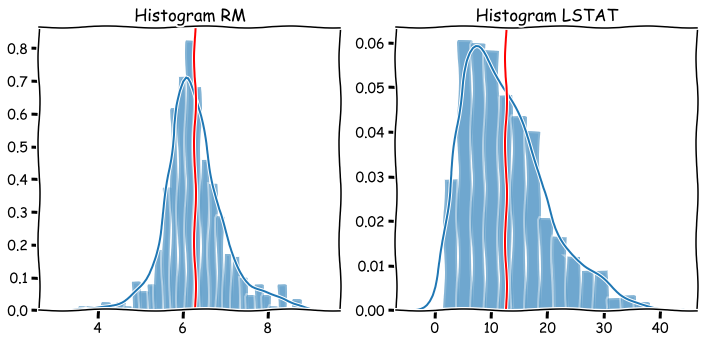

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='') 
ax1.set_title('Histogram RM')
ax1.axvline(boston.RM.mean(), 0, 1, color='red') #平均の垂直線を追加
sns.distplot(boston.LSTAT, ax=ax2, axlabel='')
ax2.set_title('Histogram LSTAT')
ax2.axvline(boston.LSTAT.mean(), 0, 1, color='red') #平均の垂直線を追加
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### 平均値がダメなら中央値
$$
median(x) = x_{median} =
\begin{cases}
 x_{(N + 1)/2}                                  & \text{if } N \text{ が奇数.} \\
 \dfrac{1}{2}( x_{N/2} + x_{N/2 + 1}) & \text{if } N \text{  が偶数.}
\end{cases}
$$

In [85]:
boston['PRICE'].median() # or np.median(boston['PRICE'])

21.2

- データを順番に並べた際の真ん中の値 (データの数が偶数の場合、真ん中に近い二つのデータの平均)
- 平均値と違い、外れ値の影響受けにくいが、1個のデータで持って代表値としていることに注意
- 実際のデータの形(分布)を見てみることが**超大事**❗️(2回目)

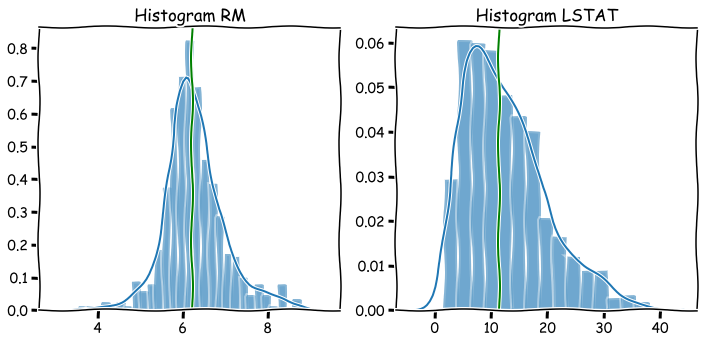

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='')
ax1.set_title('Histogram RM')
ax1.axvline(boston.RM.median(), 0, 1, color='green') # 中央値の垂直線を追加
sns.distplot(boston.LSTAT, ax=ax2, axlabel='')
ax2.set_title('Histogram LSTAT')
ax2.axvline(boston.LSTAT.median(), 0, 1, color='green') # 中央値の垂直線を追加
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### せっかくなので最頻値も
- 数式で表しにくい~めんどくさい~ので、テストの点数が `10, 20, 30, 30, 40, 50` だとすると、最も出現数が多い `30` が最頻値
- データが離散値ではなく連続値の場合は、`10~19`, `20~29` のように `10` 刻みにして、各階級に落とし込む
- ただし階級幅によって、最頻値が変わることに注意
- 実際のデータの形(分布)を見てみることが**超大事**❗️(n回目)

#### 参考までに・・・スタージェスの公式 *Sturges' formula*
- データの個数Nが与えられた時に**目安となる**階級幅kを得る公式
$$
k = \log_2 N + 1 
$$

In [129]:
stur = np.ceil(np.log2(boston.shape[0]) + 1)
print(stur)

10.0


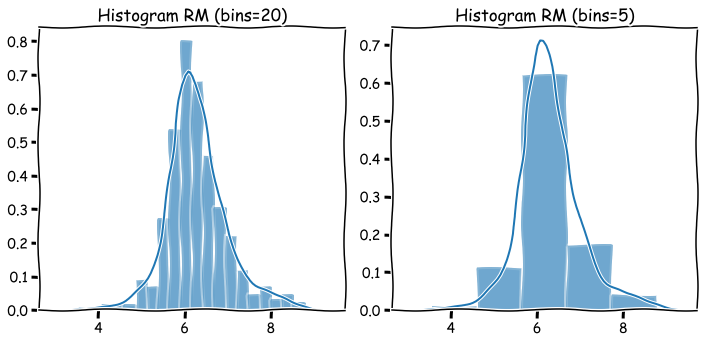

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='', bins=20) # binsは階級幅ではなく、階級の個数であることに注意
ax1.set_title('Histogram RM (bins=20)')
sns.distplot(boston.RM, ax=ax2, axlabel='', bins=5)
ax2.set_title('Histogram RM (bins=5)')
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### データのばらつきもみよう-分散
$$
{\sigma}^{2}=\frac{1}{N}\sum_{i=1}^{n}(x_{i} - \bar{x})^2
$$

In [128]:
boston['PRICE'].var(ddof=0) # or np.var(boston['PRICE']) 

84.41955615616556

- データがどれくらいばらついているかを測る指標
- 分散に平方根をとると **標準偏差** と呼ばれる指標になります
- 上のコードのddofは、degree of freedom(自由度)と呼ばれる少々ややこしい概念ですが、今回は省略します。Pandasではddof=1, Numpyではddof=0がデフォルトです。
- ddof=1の場合、$N$ ではなく $N-1$ で割ります。

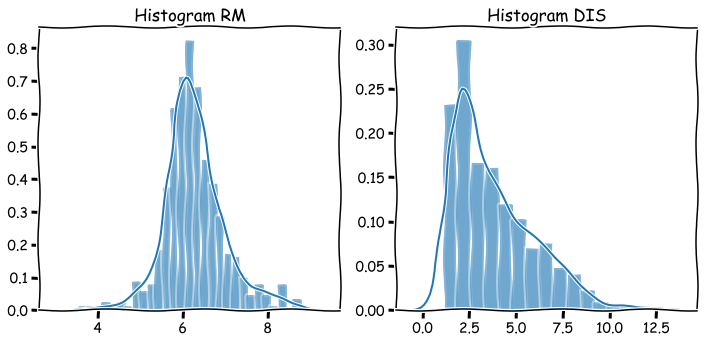

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='')
ax1.set_title('Histogram RM')
sns.distplot(boston.DIS, ax=ax2, axlabel='')
ax2.set_title('Histogram DIS')
plt.tight_layout() # グラフが重ならないようにする
plt.show()

In [135]:
RM_var = boston['RM'].var(ddof=0)
DIS_var = boston['DIS'].var(ddof=0)
print('RM_var: {}    DIS_var: {}'.format(RM_var, DIS_var))

RM_var: 0.49269521612976297    DIS: 4.425252261616491


### 予想通りDISの方が分散が大きい！ <- 実は罠です💀
- 分散の単位は、データの単位の2乗になるので、単純な比較はできない
- 変動係数を使いましょう！
- 変動係数は標準偏差(=つまり元のデータと同じ単位)を元のデータの単位で割るので、単位がない無名数になります
$$
C.V.=\frac{\sigma} {\overline x}
$$

In [137]:
RM_cv = np.sqrt(RM_var) / RM_var.mean()
DIS_cv = np.sqrt(DIS_var) / DIS_var.mean()
print('RM_cv: {}    DIS_cv: {}'.format(RM_cv, DIS_cv))

RM_cv: 1.4246586761047442    DIS_cv: 0.4753691387473648


#### 参考までに・・・標準化
- データの種類によって、平均と分散が違うため、主に機械学習分野で平均を0、分散を1に変換する手法がよく使われます
$$
z_{i} = \frac{x_{i} - \bar{x}} {\sigma}
$$

#### もうちょっと参考までに・・・偏差値
- 偏差値は標準化のバリエーションの一つで、平均を50, 分散を10に変換したものです。
$$
z_{i} = 50 + \frac{10(x_{i} - \bar{x})} {\sigma}
$$